# Task 2: Predict Future Stock Prices (Short-Term)

# Objective
Predict the next day's closing price of a selected stock using historical stock data.

# Cell 1: Import Libraries and Setup
Imports all necessary libraries for: data fetching (yfinance),  data handling (pandas),   plotting (matplotlib),   feature scaling,   train-test split,   modeling (LinearRegression & RandomForestRegressor), and evaluation (mean_squared_error).
%matplotlib inline ensures plots display within the notebook.


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Cell 2: Load Historical Stock Data
Downloads Apple (AAPL) stock data from Yahoo Finance from 2018-01-01 to 2023-11-15 with adjusted prices (auto_adjust=True).
Resets the DataFrame index so that Date becomes a column.
Displays the first 5 rows to inspect the data.
# Output: 
   A table showing the first 5 rows with columns: Date, Open, High, Low, Close, Volume.
   Provides a quick look at stock price trends and data structure.



In [6]:
# Fetch historical stock data (Apple example) with adjusted prices
data = yf.download('AAPL', start="2018-01-01", end="2023-11-15", auto_adjust=True)

# Reset index to have 'Date' as a column
data.reset_index(inplace=True)

# Display the first 5 rows
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2018-01-02,40.341888,40.351258,39.639313,39.850088,102223600
1,2018-01-03,40.334854,40.878181,40.271625,40.405112,118071600
2,2018-01-04,40.522224,40.625269,40.299743,40.407469,89738400
3,2018-01-05,40.983582,41.070231,40.526908,40.618243,94640000
4,2018-01-08,40.831356,41.126437,40.732992,40.831356,82271200


# Cell 3:Train Regression Models and Evaluate

Selects features (Open, High, Low, Volume) and target (Close).
    
Splits data into train (80%) and test (20%) sets without shuffling (important for time series).
    
Converts y_train and y_test to 1D arrays to avoid sklearn warnings.
    
Trains two regression models: Linear Regression, Random Forest Regressor
    
Makes predictions on the test set.
    
Computes and prints Mean Squared Error (MSE) for both models.

# Output: 
    Printed MSE values for Linear Regression and Random Forest, showing the accuracy of each model’s predictions.

In [7]:
# Features and target
X = data[['Open','High','Low','Volume']]
y = data['Close']  # pandas Series (1D)

# Train-test split (time series, no shuffle)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Convert y_train and y_test to 1D arrays explicitly
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# MSE
from sklearn.metrics import mean_squared_error
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Linear Regression MSE: 0.7830932592700663
Random Forest MSE: 25.899095472171133


# Cell 4: Plot Actual vs Predicted Closing Prices
In this step, we visualize the model predictions compared to actual stock prices:
    
Extract the dates corresponding to the test set for the x-axis.
    
Plot actual closing prices (y_test) and predictions from:

 Linear Regression (red line)
 Random Forest Regressor (green line)

Add labels, title, and legend for clarity.

# Output: 
    A line plot showing how closely each model’s predictions follow the actual AAPL closing prices over the test period.
    Helps assess model performance visually and compare accuracy between Linear Regression and Random Forest.



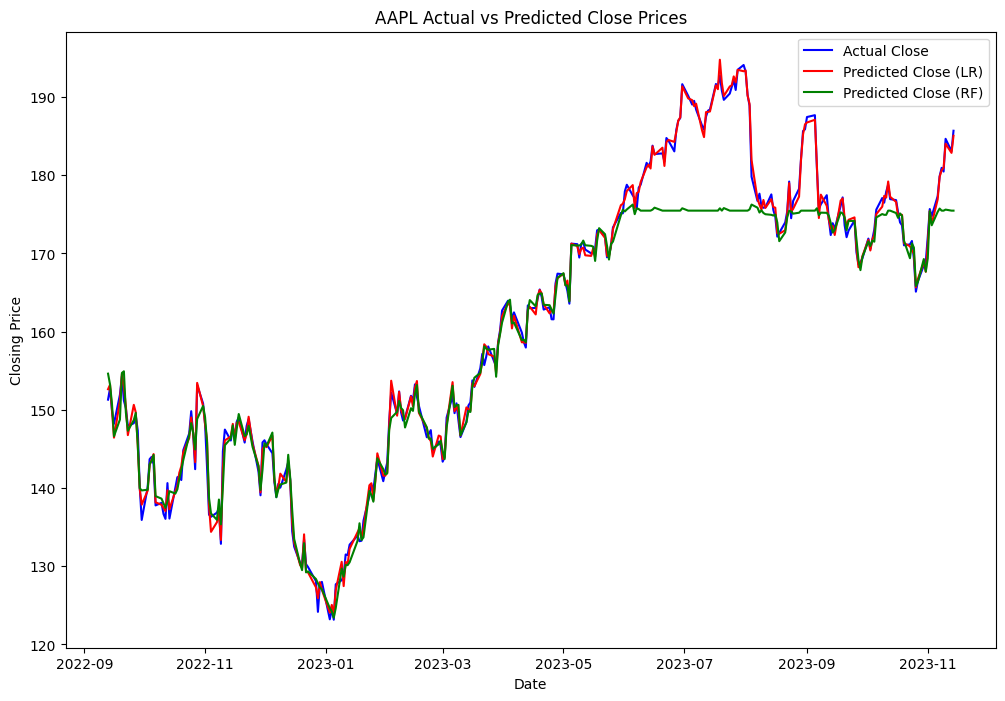

In [10]:
# Dates corresponding to the test set
test_dates = data['Date'][split_idx:]  # Use the same indices as y_test

plt.figure(figsize=(12,8))
plt.plot(test_dates, y_test, label='Actual Close', color='blue')
plt.plot(test_dates, y_pred_lr, label='Predicted Close (LR)', color='red')
plt.plot(test_dates, y_pred_rf, label='Predicted Close (RF)', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Actual vs Predicted Close Prices')
plt.legend()
plt.show()

# Final Insights

Historical Apple stock data shows clear trends; Open, High, Low, and Volume help predict Close.


Linear Regression: Follows overall trends well; low MSE (~0.78).


Random Forest: Captures fluctuations but higher MSE (~26).


Visualization: Linear Regression predictions are smoother; Random Forest is more volatile.


Takeaway: Linear Regression is stable for short-term forecasting; Random Forest may need tuning.

